### Sequential Learning for Multi-Channel Wireless Network Monitoring With Channel Switching Costs

In [115]:
class AP:
    count = 0
    
    def __init__(self, x, y):
        AP.count += 1
        self.x = x
        self.y = y
        self.channel = 0
        self.radius = 86
        
    def in_hexagon(self, x, y):
        x = abs(x - self.x)
        y = abs(y - self.y)
        s = self.radius
        return y < 3**0.5 * min(s - x, s / 2)


In [116]:
class Sniffer:
    count = 0
    
    def __init__(self, x, y):
        Sniffer.count += 1
        self.x = x
        self.y = y
        self.channel = 0
        self.radius = 2
        
    def in_range(self, x, y):
        x = abs(x - self.x)
        y = abs(y - self.y)
        r = self.radius
        return pow(x,2.0) + pow(y,2.0) <= pow(r,2.0)
    

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np
from math import pi

In [118]:
sniffers = []
for i in range(0, 550, 100):
    for j in range(0, 550, 100):
        sniffers.append(Sniffer(i,j))

In [119]:
aps = []
for i in range(0, 550, 86*3):
    for j in range(0, 550, 86*2):
        aps.append(AP(i,j))
        
for i in range(86+int(86/2), 550, 86*3):
    for j in range(-86, 550+86, 86*2):
        aps.append(AP(i,j))

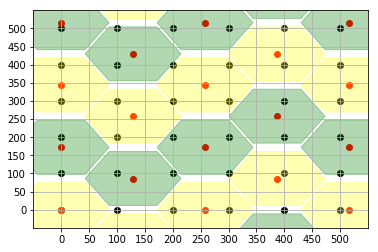

In [122]:
x = [a.x for a in sniffers]
y = [a.y for a in sniffers]

x1 = [a.x for a in aps]
y1 = [a.y for a in aps]

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 550, 50))
ax.set_yticks(np.arange(0, 550, 50))

for i, a in enumerate(aps):
    if i%2 ==0:
        circle = RegularPolygon((a.x, a.y), 6, radius=a.radius, color="yellow", orientation=pi/2, alpha=0.3)
    else:
        circle = RegularPolygon((a.x, a.y), 6, radius=a.radius, color="green", orientation=pi/2, alpha=0.3)
    ax.add_patch(circle)
    
plt.scatter(x,y, color='black')
plt.scatter(x1,y1, color='red')    

ax.set_xlim(-50, 550)
ax.set_ylim(-50, 550)
plt.grid()
plt.show()